# Proyek Analisis Data: [E-Commerce Public Dataset]
- **Nama:** Siti Yuniasih
- **Email:** yuniasihana38@gmail.com
- **ID Dicoding:** siti_yuniasih

## Menentukan Pertanyaan Bisnis

- Apa distribusi jumlah pelanggan di setiap negara bagian?
- Berapa jumlah pesanan yang diterima per bulan, dan bagaimana trennya?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Wrangling

### Gathering Data
Mengumpulkan semua data yang dibutuhkan :

In [ ]:
customers_df = pd.read_csv('/content/drive/MyDrive/E-Commerce Public Dataset/customers_dataset.csv')
orders_df = pd.read_csv('/content/drive/MyDrive/E-Commerce Public Dataset/orders_dataset.csv')
sellers_df = pd.read_csv('/content/drive/MyDrive/E-Commerce Public Dataset/sellers_dataset.csv')

In [ ]:
customers_df.head(), orders_df.head(), sellers_df.head()

(                        customer_id                customer_unique_id  \
 0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
 1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
 2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
 3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
 4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   
 
    customer_zip_code_prefix          customer_city customer_state  
 0                     14409                 franca             SP  
 1                      9790  sao bernardo do campo             SP  
 2                      1151              sao paulo             SP  
 3                      8775        mogi das cruzes             SP  
 4                     13056               campinas             SP  ,
                            order_id                       customer_id  \
 0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10

### Assessing Data
Menilai kualitas dari seluruh data yang akan digunakan.

In [ ]:
customers_df.info(), orders_df.info(), sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4

(None, None, None)

### Cleaning Data
Membersihkan berbagai masalah yang telah teridentifikasi dalam proses assessing data.

In [ ]:
# Mengubah kolom date di orders_df ke datetime format
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
orders_df['order_approved_at'] = pd.to_datetime(orders_df['order_approved_at'])
orders_df['order_delivered_carrier_date'] = pd.to_datetime(orders_df['order_delivered_carrier_date'])
orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'])
orders_df['order_estimated_delivery_date'] = pd.to_datetime(orders_df['order_estimated_delivery_date'])

# Mengatasi missing value di kolom date tanpa inplace parameter
orders_df['order_approved_at'] = orders_df['order_approved_at'].fillna(orders_df['order_purchase_timestamp'])
orders_df['order_delivered_carrier_date'] = orders_df['order_delivered_carrier_date'].fillna(orders_df['order_approved_at'].median())
orders_df['order_delivered_customer_date'] = orders_df['order_delivered_customer_date'].fillna(orders_df['order_estimated_delivery_date'])

# Mengecek perubahan
orders_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99441 non-null  datetime64[ns]
 5   order_delivered_carrier_date   99441 non-null  datetime64[ns]
 6   order_delivered_customer_date  99441 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


## Exploratory Data Analysis (EDA)

In [ ]:
# Mengelompokkan pelanggan berdasarkan negara bagian untuk menghitung jumlah pelanggan unik di setiap negara bagian
customers_by_state = customers_df.groupby('customer_state')['customer_id'].nunique().reset_index()
customers_by_state.rename(columns={'customer_id': 'customer_count'}, inplace=True)

# Mengurutkan data berdasarkan jumlah pelanggan secara menurun
customers_by_state = customers_by_state.sort_values(by='customer_count', ascending=False)

# Menampilkan 5 negara bagian dengan pelanggan terbanyak
customers_by_state.head()


,customer_state,customer_count
25,SP,41746
18,RJ,12852
10,MG,11635
22,RS,5466
17,PR,5045


## Visualization & Explanatory Analysis

### Apa distribusi jumlah pelanggan di setiap negara bagian?

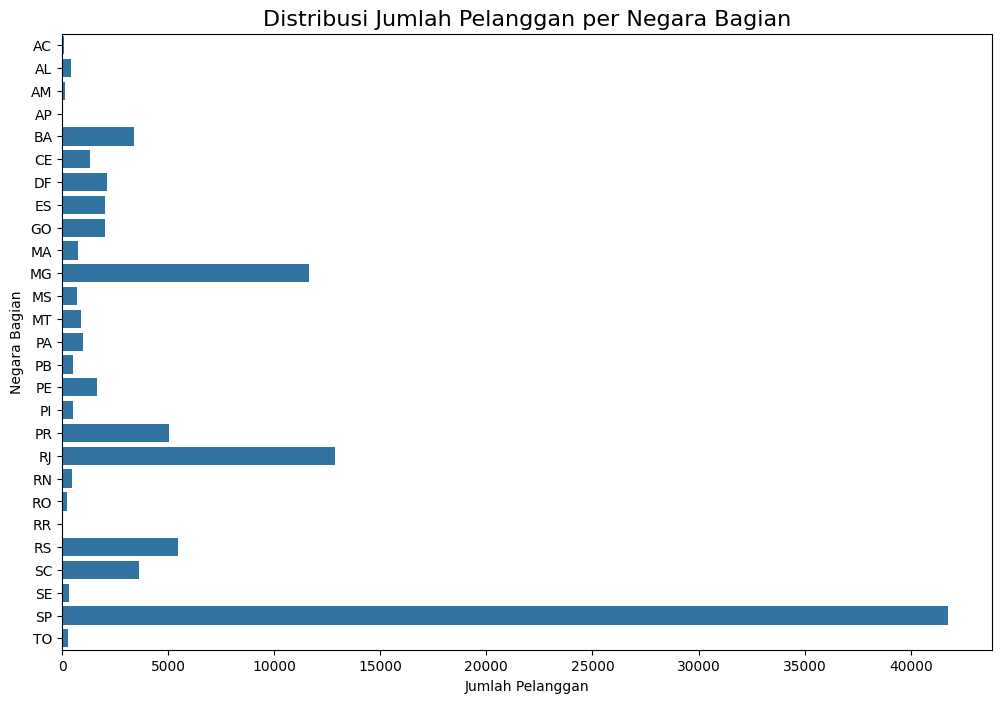

In [ ]:
# Menghitung jumlah pelanggan per negara bagian
customers_by_state = customers_df.groupby('customer_state')['customer_id'].nunique().reset_index()
customers_by_state.rename(columns={'customer_id': 'customer_count'}, inplace=True)

# Plot distribusi pelanggan berdasarkan negara bagian
plt.figure(figsize=(12, 8))
sns.barplot(x='customer_count', y='customer_state', data=customers_by_state)
plt.title('Distribusi Jumlah Pelanggan per Negara Bagian', fontsize=16)
plt.xlabel('Jumlah Pelanggan')
plt.ylabel('Negara Bagian')
plt.show()


### Berapa jumlah pesanan yang diterima per bulan, dan bagaimana trennya?

In [ ]:
orders_by_month = orders_df.groupby('order_month')['order_id'].count().reset_index()
orders_by_month.rename(columns={'order_id': 'order_count'}, inplace=True)

In [ ]:
orders_by_month['order_month'] = orders_by_month['order_month'].astype(str)
print(orders_by_month)

   order_month  order_count
0      2016-09            1
1      2016-10          326
2      2016-12            1
3      2017-01          763
4      2017-02         1779
5      2017-03         2691
6      2017-04         2378
7      2017-05         3702
8      2017-06         3256
9      2017-07         3979
10     2017-08         4354
11     2017-09         4305
12     2017-10         4595
13     2017-11         7404
14     2017-12         5839
15     2018-01         7188
16     2018-02         6710
17     2018-03         7291
18     2018-04         6778
19     2018-05         7067
20     2018-06         6164
21     2018-07         6177
22     2018-08         6673
23     2018-09           16
24     2018-10            4


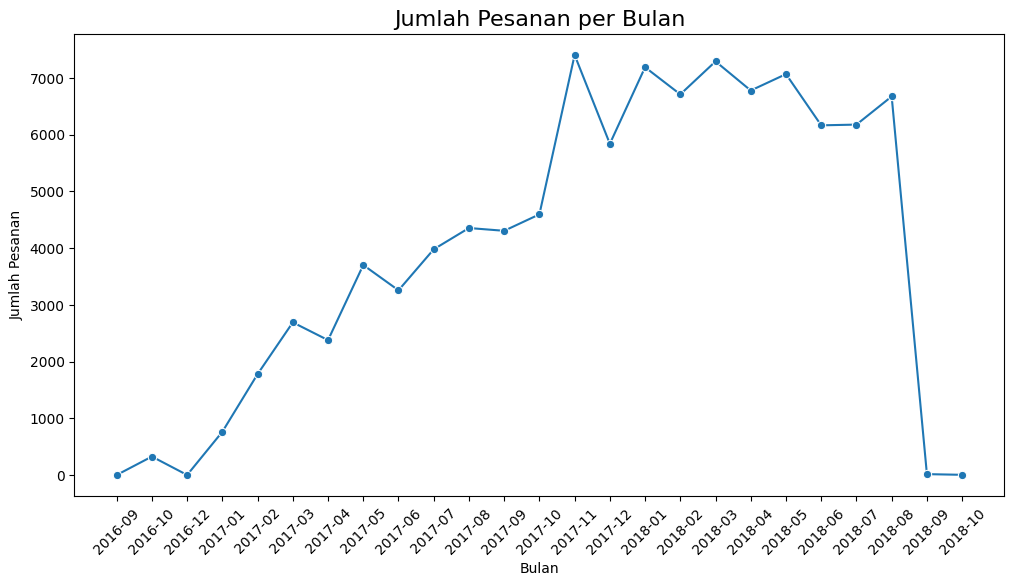

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='order_month', y='order_count', data=orders_by_month, marker='o')
plt.xticks(rotation=45)
plt.title('Jumlah Pesanan per Bulan', fontsize=16)
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pesanan')
plt.show()

## Conclusion

**Apa distribusi jumlah pelanggan di setiap negara bagian?**

**Hasil:** Berdasarkan analisis jumlah pelanggan, negara bagian dengan jumlah pelanggan terbanyak adalah São Paulo (SP) dengan total 41.746 pelanggan.

**Visualisasi:** Grafik batang (bar chart) menampilkan distribusi jumlah pelanggan di berbagai negara bagian, memberikan gambaran yang jelas tentang provinsi yang mendominasi jumlah pelanggan.

**Insight:**
- São Paulo menjadi pasar utama dengan jumlah pelanggan tertinggi.
- Provinsi dengan jumlah pelanggan rendah bisa menjadi peluang untuk memperluas pemasaran.

**Berapa jumlah pesanan yang diterima per bulan, dan bagaimana trennya?**

**Hasil:** Berdasarkan analisis jumlah pesanan per bulan, bulan dengan pesanan terbanyak adalah November 2017 dengan 7.404 pesanan.

**Visualisasi:** Grafik garis (line plot) menunjukkan tren pesanan yang diterima per bulan, membantu dalam memahami fluktuasi dari waktu ke waktu.

**Insight:**
- Bulan November 2017 menunjukkan peningkatan pesanan yang signifikan, kemungkinan terkait dengan peristiwa musiman seperti promosi atau liburan.
- Tren ini bisa membantu dalam merencanakan kampanye penjualan atau menambah stok di bulan-bulan dengan performa tinggi.